In [5]:
import pickle

with open('assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/expert_trajs/trajs16.pkl', 'rb') as file:
    array = pickle.load(file)


print(array.keys()) # dict_keys(['states', 'actions'])

print(len(array['states'])) # 2
print(len(array['actions'])) # 2

print(len(array['states'][0])) # up to 10000 depends how many steps we had in the specific episode
print(len(array['actions'][0])) # up to 10000 depends how many steps we had in the specific episode

print(len(array['states'][0][0])) # 8 features for the state
print((array['actions'][0])) # 4 possible actions (0, 1, 2, 3)



dict_keys(['states', 'actions'])
2
2
392
391
8
[np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(3), np.

In [8]:
import pickle
with open('assets/trajectories_CartPole-v1/expert_trajectories.pkl', 'rb') as file:
    array = pickle.load(file)


array

{'states': array([[ 0.0239491 ,  0.00254985,  0.0485121 ,  0.00283134],
        [ 0.02400009,  0.1969437 ,  0.04856873, -0.27415943],
        [ 0.02793897,  0.00116363,  0.04308554,  0.03343797],
        ...,
        [ 0.04541821,  0.20518431,  0.00150656, -0.30876467],
        [ 0.04952189,  0.01004092, -0.00466873, -0.01560699],
        [ 0.04972271, -0.18501376, -0.00498087,  0.27559924]],
       dtype=float32),
 'actions': array([1, 0, 1, ..., 0, 0, 1])}

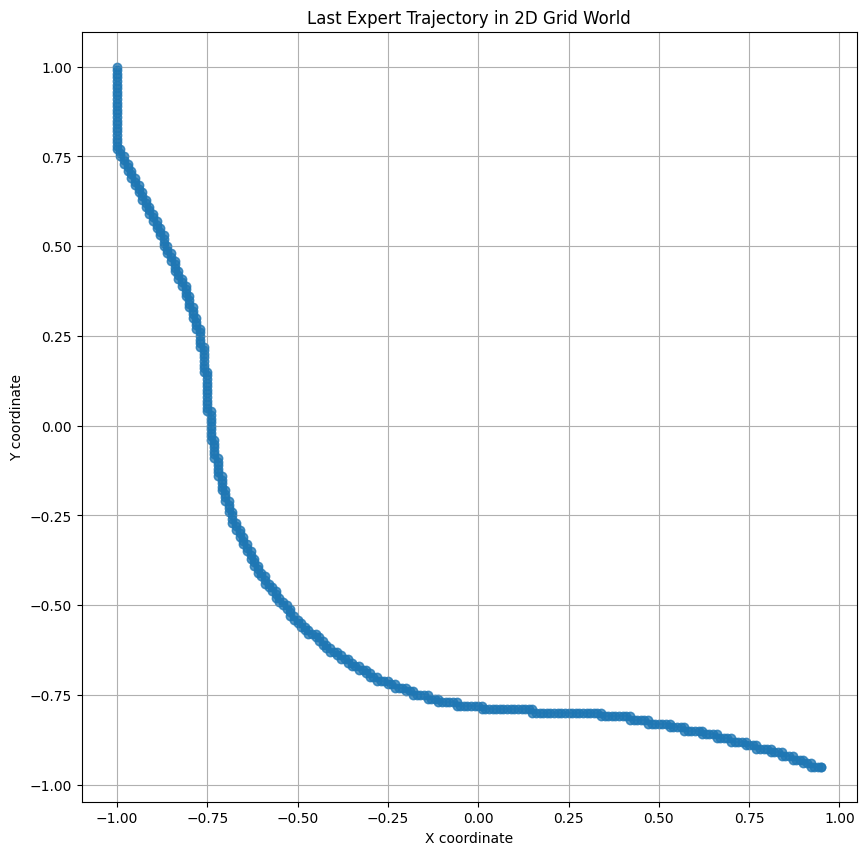

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the data
with open('assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/expert_trajs/trajs16.pkl', 'rb') as file:
    array = pickle.load(file)

# Get the last trajectory
last_episode_states = array['states'][-1]

# Extract x and y coordinates from the last trajectory
x = [state[0] for state in last_episode_states]
y = [state[1] for state in last_episode_states]

# Create the plot
plt.figure(figsize=(10, 10))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y, '-o', alpha=0.5)  # This will connect the points in order
plt.title('Last Expert Trajectory in 2D Grid World')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Add grid lines
plt.grid(True)

# Set axis limits if you know the grid size
# plt.xlim(0, grid_size_x)
# plt.ylim(0, grid_size_y)

plt.show()

In [2]:
import numpy as np
import plotly.graph_objects as go

# Define the cost function
def cost_function(state, terminal_area):
    x, y = state
    cost = -(x - 1)**2 - (y + 1)**2 - 80 * np.exp(-8 * x**2 - 8 * y**2)
    if (terminal_area[0, 0] <= x <= terminal_area[0, 1] and
        terminal_area[1, 0] <= y <= terminal_area[1, 1]):
        cost += 100
    return cost

# Create a grid of state values, restricted to the region [-1, 1]
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Define the terminal area
terminal_area = np.array([[0.95, 1.0], [-1.0, -0.95]])

# Calculate the cost for each (x, y) pair
Z = np.array([[cost_function((x, y), terminal_area) for x in x_vals] for y in y_vals])

# Create the interactive 3D surface plot using plotly
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

# Customize the layout
fig.update_layout(
    title='Interactive Cost Function Surface (Region [-1, 1])',
    scene=dict(
        xaxis_title='State[0]',
        yaxis_title='State[1]',
        zaxis_title='Cost',
    ),
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('runs_memory_replay/true_rewards.csv')

# Group by num_of_NNs and run_id, then find the max true_reward for each group
max_rewards = df.groupby(['num_of_NNs', 'run_id'])['true_reward'].max().reset_index()

# Calculate the average and standard deviation of max true_rewards for each num_of_NNs
avg_max_rewards = max_rewards.groupby('num_of_NNs')['true_reward'].agg(['mean', 'std']).reset_index()

# Sort the results by num_of_NNs
avg_max_rewards = avg_max_rewards.sort_values('num_of_NNs')

# Create the plot
plt.figure(figsize=(12, 7))
plt.errorbar(avg_max_rewards['num_of_NNs'], avg_max_rewards['mean'], 
             yerr=avg_max_rewards['std'], fmt='o-', capsize=5, capthick=2, ecolor='red', markersize=8)

plt.xlabel('Number of Neural Networks')
plt.ylabel('Average Max True Reward')
plt.title('Average Max True Reward vs Number of Neural Networks (with Confidence Intervals) - memory replay')
plt.grid(True)

# Add value labels on the points
for x, y, std in zip(avg_max_rewards['num_of_NNs'], avg_max_rewards['mean'], avg_max_rewards['std']):
    plt.annotate(f'{y:.2f} ± {std:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.tight_layout()
plt.show()

: 

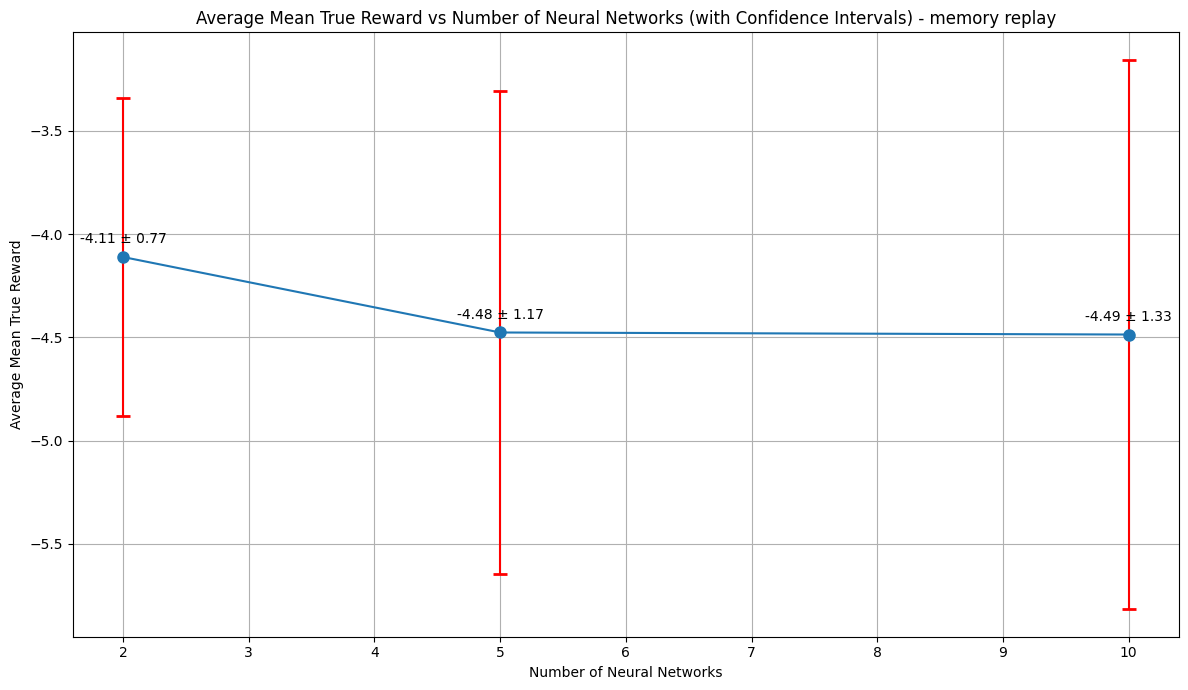

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('runs/true_rewards.csv')

# Calculate the mean reward for each run
mean_rewards = df.groupby(['num_of_NNs', 'run_id'])['true_reward'].mean().reset_index()

# Calculate the average and standard deviation of mean rewards for each num_of_NNs
avg_mean_rewards = mean_rewards.groupby('num_of_NNs')['true_reward'].agg(['mean', 'std']).reset_index()

# Sort the results by num_of_NNs
avg_mean_rewards = avg_mean_rewards.sort_values('num_of_NNs')

# Create the plot
plt.figure(figsize=(12, 7))
plt.errorbar(avg_mean_rewards['num_of_NNs'], avg_mean_rewards['mean'], 
             yerr=avg_mean_rewards['std'], fmt='o-', capsize=5, capthick=2, ecolor='red', markersize=8)

plt.xlabel('Number of Neural Networks')
plt.ylabel('Average Mean True Reward')
plt.title('Average Mean True Reward vs Number of Neural Networks (with Confidence Intervals) - memory replay')
plt.grid(True)

# Add value labels on the points
for x, y, std in zip(avg_mean_rewards['num_of_NNs'], avg_mean_rewards['mean'], avg_mean_rewards['std']):
    plt.annotate(f'{y:.2f} ± {std:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.tight_layout()
plt.show()

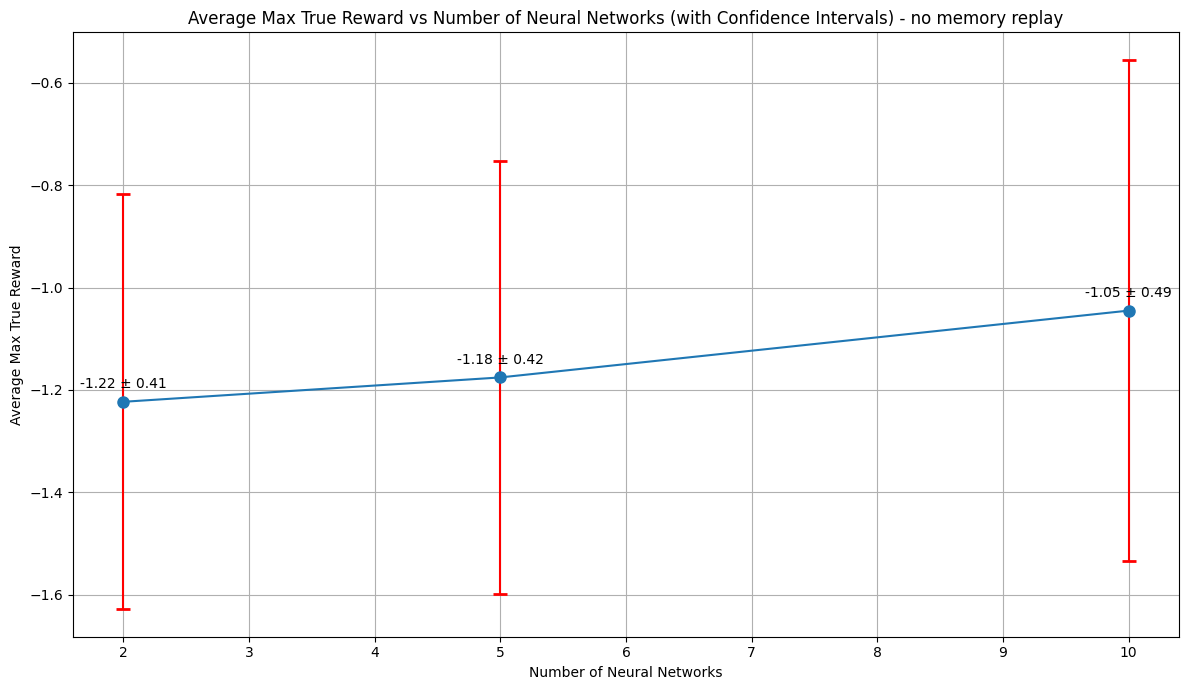

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('runs_no_memory_replay/true_rewards.csv')

# Group by num_of_NNs and run_id, then find the max true_reward for each group
max_rewards = df.groupby(['num_of_NNs', 'run_id'])['true_reward'].max().reset_index()

# Calculate the average and standard deviation of max true_rewards for each num_of_NNs
avg_max_rewards = max_rewards.groupby('num_of_NNs')['true_reward'].agg(['mean', 'std']).reset_index()

# Sort the results by num_of_NNs
avg_max_rewards = avg_max_rewards.sort_values('num_of_NNs')

# Create the plot
plt.figure(figsize=(12, 7))
plt.errorbar(avg_max_rewards['num_of_NNs'], avg_max_rewards['mean'], 
             yerr=avg_max_rewards['std'], fmt='o-', capsize=5, capthick=2, ecolor='red', markersize=8)

plt.xlabel('Number of Neural Networks')
plt.ylabel('Average Max True Reward')
plt.title('Average Max True Reward vs Number of Neural Networks (with Confidence Intervals) - no memory replay')
plt.grid(True)

# Add value labels on the points
for x, y, std in zip(avg_max_rewards['num_of_NNs'], avg_max_rewards['mean'], avg_max_rewards['std']):
    plt.annotate(f'{y:.2f} ± {std:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.tight_layout()
plt.show()

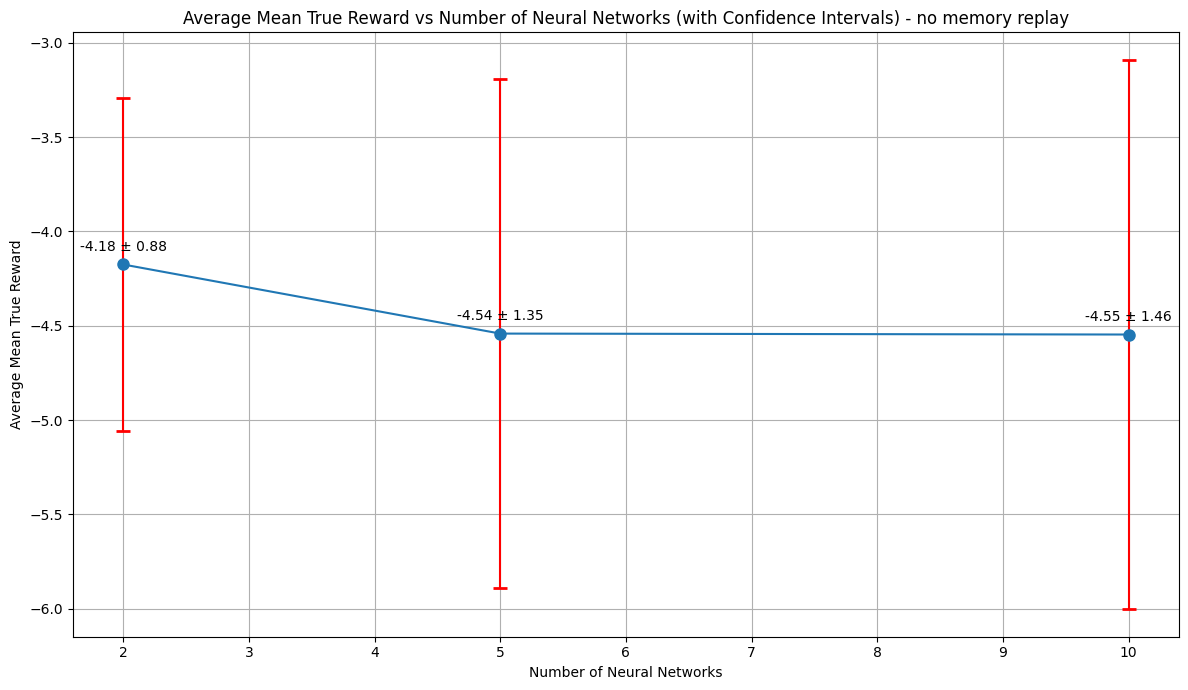

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('runs_no_memory_replay/true_rewards.csv')

# Calculate the mean reward for each run
mean_rewards = df.groupby(['num_of_NNs', 'run_id'])['true_reward'].mean().reset_index()

# Calculate the average and standard deviation of mean rewards for each num_of_NNs
avg_mean_rewards = mean_rewards.groupby('num_of_NNs')['true_reward'].agg(['mean', 'std']).reset_index()

# Sort the results by num_of_NNs
avg_mean_rewards = avg_mean_rewards.sort_values('num_of_NNs')

# Create the plot
plt.figure(figsize=(12, 7))
plt.errorbar(avg_mean_rewards['num_of_NNs'], avg_mean_rewards['mean'], 
             yerr=avg_mean_rewards['std'], fmt='o-', capsize=5, capthick=2, ecolor='red', markersize=8)

plt.xlabel('Number of Neural Networks')
plt.ylabel('Average Mean True Reward')
plt.title('Average Mean True Reward vs Number of Neural Networks (with Confidence Intervals) - no memory replay')
plt.grid(True)

# Add value labels on the points
for x, y, std in zip(avg_mean_rewards['num_of_NNs'], avg_mean_rewards['mean'], avg_mean_rewards['std']):
    plt.annotate(f'{y:.2f} ± {std:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.tight_layout()
plt.show()